# Overview
The task is to identify sleep patterns given samples of accelerometer data. 

In [1]:
# Render our plots inline
%matplotlib inline

import numpy as np
import h5py
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
from pandas import HDFStore,DataFrame
import itertools

In [2]:
def load_data(subject_number):
    filename = filepath + subject_number +'_labelled.csv'
    hf = h5py.File(filename, 'r')

    reread = pd.read_hdf(filename)
    data = reread#.head(10000)
    hf.close()
    return data

def load_csv(filename):
    data = pd.read_csv(filepath + filename)
    
    return data

In [3]:
X = load_csv('Data_energy_features.csv')
y = load_csv('Data_energy_targets.csv')

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,16.927285,0.028197,0.903463,-0.898415,0.095374,12.844111,-0.973280,-28300.063776,-0.106159,0.134098,...,5.736823,44696.882877,0.070030,0.020998,0.0,244.0,3183.0,2589.0,0.000736,0.001776
1,17.129378,0.029303,0.905216,-0.900056,0.096513,12.586510,-0.779992,-28351.774136,-0.107230,0.134744,...,5.704391,44683.243507,0.070242,0.022157,0.0,265.0,3108.0,2600.0,0.000741,0.001762
2,17.426747,0.031346,0.911347,-0.906042,0.098189,12.149641,-0.708069,-28540.320374,-0.108371,0.140949,...,5.443982,44689.143462,0.072701,0.024180,0.0,259.0,3055.0,2632.0,0.000753,0.001751
3,19.352964,0.036833,0.915983,-0.909469,0.109042,15.777364,0.240599,-28648.275029,-0.119896,0.145187,...,5.018413,44737.946757,0.079423,0.025706,0.0,251.0,2994.0,2638.0,0.000784,0.001727
4,29.635949,0.040855,0.910935,-0.895500,0.166980,18.379793,3.015666,-28208.260675,-0.186465,0.146625,...,4.751292,44771.750679,0.084323,0.027117,0.0,248.0,2931.0,2633.0,0.000931,0.001697


In [5]:
y.head()

,0
0,2
1,2
2,2
3,2
4,2


In [6]:
# reset index 
#X = X.drop(['Unnamed: 0'], axis=1)
#y = y.drop(['Unnamed: 0'], axis=1)

#X.head()

In [7]:
y.shape[0]

38340

# Feature selection

In [10]:
#get the names of all features

features_x1 = ['energy_x1','mmm_x1', 'rms_x1', 'mean_x1', 'std_x1', 'k_x1', 'sk_x1', 'sum_x1', 'cv_x1', 'iqr_x1', 'zcr_x1', 'smc_x1', 'smp_x1', 'smf_x1']
features_y1 = ['energy_y1','mmm_y1', 'rms_y1', 'mean_y1', 'std_y1', 'k_y1', 'sk_y1', 'sum_y1', 'cv_y1', 'iqr_y1', 'zcr_y1', 'smc_y1', 'smp_y1', 'smf_y1']
features_z1 = ['energy_z1','mmm_z1', 'rms_z1', 'mean_z1', 'std_z1', 'k_z1', 'sk_z1', 'sum_z1', 'cv_z1', 'iqr_z1', 'zcr_z1', 'smc_z1', 'smp_z1', 'smf_z1']
features_x2 = ['energy_x2','mmm_x2', 'rms_x2', 'mean_x2', 'std_x2', 'k_x2', 'sk_x2', 'sum_x2', 'cv_x2', 'iqr_x2', 'zcr_x2', 'smc_x2', 'smp_x2', 'smf_x2']
features_y2 = ['energy_y2','mmm_y2', 'rms_y2', 'mean_y2', 'std_y2', 'k_y2', 'sk_y2', 'sum_y2', 'cv_y2', 'iqr_y2', 'zcr_y2', 'smc_y2', 'smp_y2', 'smf_y2']
features_z2 = ['energy_z2','mmm_z2', 'rms_z2', 'mean_z2', 'std_z2', 'k_z2', 'sk_z2', 'sum_z2', 'cv_z2', 'iqr_z2', 'zcr_z2', 'smc_z2', 'smp_z2', 'smf_z2']
features_m = ['energy_m','mmm_m', 'rms_m', 'mean_m', 'std_m', 'k_m', 'sk_m', 'sum_m', 'cv_m', 'iqr_m', 'zcr_m', 'smc_m', 'smp_m', 'smf_m']
features_e = ['energy_1', 'energy_2']

feature_names_2 = features_x1 + features_y1 + features_z1 + features_x2 + features_y2 + features_z2 + features_m + features_e

features_x1 = ['mmm_x1', 'rms_x1', 'mean_x1', 'std_x1', 'k_x1', 'sk_x1', 'sum_x1', 'cv_x1', 'iqr_x1', 'zcr_x1', 'smc_x1', 'smp_x1', 'smf_x1']
features_y1 = ['mmm_y1', 'rms_y1', 'mean_y1', 'std_y1', 'k_y1', 'sk_y1', 'sum_y1', 'cv_y1', 'iqr_y1', 'zcr_y1', 'smc_y1', 'smp_y1', 'smf_y1']
features_z1 = ['mmm_z1', 'rms_z1', 'mean_z1', 'std_z1', 'k_z1', 'sk_z1', 'sum_z1', 'cv_z1', 'iqr_z1', 'zcr_z1', 'smc_z1', 'smp_z1', 'smf_z1']
features_x2 = ['mmm_x2', 'rms_x2', 'mean_x2', 'std_x2', 'k_x2', 'sk_x2', 'sum_x2', 'cv_x2', 'iqr_x2', 'zcr_x2', 'smc_x2', 'smp_x2', 'smf_x2']
features_y2 = ['mmm_y2', 'rms_y2', 'mean_y2', 'std_y2', 'k_y2', 'sk_y2', 'sum_y2', 'cv_y2', 'iqr_y2', 'zcr_y2', 'smc_y2', 'smp_y2', 'smf_y2']
features_z2 = ['mmm_z2', 'rms_z2', 'mean_z2', 'std_z2', 'k_z2', 'sk_z2', 'sum_z2', 'cv_z2', 'iqr_z2', 'zcr_z2', 'smc_z2', 'smp_z2', 'smf_z2']
features_m = ['mmm_m', 'rms_m', 'mean_m', 'std_m', 'k_m', 'sk_m', 'sum_m', 'cv_m', 'iqr_m', 'zcr_m', 'smc_m', 'smp_m', 'smf_m']

feature_names_1 = features_x1 + features_y1 + features_z1 + features_x2 + features_y2 + features_z2 + features_m 

feature_names = feature_names_2 #update as needed

In [11]:
#Removing features with low variance
# We want to remove all features that are either one or zero (on or off) in more than 80% of the samples
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.80 * (1 - .80)))
X_vt = sel.fit_transform(X)

print('Number of features removed:' + str(X.shape[1]-X_vt.shape[1]))
print('Number of features left:' + str(X_vt.shape[1]))

Number of features removed:34
Number of features left:66


In [12]:
# Univariate feature selection - KBest
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

X_uni_c = SelectKBest(f_classif, k=20).fit_transform(X, y)

print('Number of features removed:' + str(X.shape[1]-X_uni_c.shape[1]))
print('Number of features left:' + str(X_uni_c.shape[1]))

Number of features removed:80
Number of features left:20


C:\Users\ailee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_l1 = model.transform(X)

print('Number of features removed:' + str(X.shape[1]-X_l1.shape[1]))
print('Number of features left:' + str(X_l1.shape[1]))

C:\Users\ailee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of features removed:40
Number of features left:60


In [14]:
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_tree = model.transform(X)

print('Number of features removed:' + str(X.shape[1]-X_tree.shape[1]))
print('Number of features left:' + str(X_tree.shape[1]))

C:\Users\ailee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\ailee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Number of features removed:78
Number of features left:22


In [15]:
#function that returns the list of features remaining after feature selection
def get_remaining_features(org_X, new_X, feature_names):
    
    org_features = org_X.iloc[0]
    new_features = new_X[0]

    remaining_names = []
    
    num_new_features = len(new_features)
    num_features = len(org_features)
    
    for i in range(num_new_features):
        feature = new_features[i]
        
        for j in range(num_features):
            f = org_features[j]
            if feature == f:
                remaining_names.append(feature_names[j])
                break
    
    return remaining_names

In [16]:
#get the list of names for the features selected through the feature selection methods

vt_features = get_remaining_features(X, X_vt, feature_names)
uni_features = get_remaining_features(X, X_uni_c, feature_names)
l1_features = get_remaining_features(X, X_l1, feature_names)
tree_features = get_remaining_features(X, X_tree, feature_names)

In [17]:
#function that returns a sorted list of all features based on their occurence in the four different feature selections.
def sort_features(features1, features2, features3, features4, feature_names):
    
    values = [0] * (len(feature_names))
    
    d = {'Feature': feature_names, 'Occurence': values}
    
    df = pd.DataFrame(data=d)
    
    length = len(feature_names)
    
    for i in range(length):
        feature = feature_names[i]
        o= 0
        
        if features1.count(feature) == 1:
            o = o + 1
        if features2.count(feature) == 1:
            o = o + 1
        if features3.count(feature) == 1:
            o = o + 1
        if features4.count(feature) == 1:
            o = o + 1
        
        df.iloc[i, 1] = o
    
    df = df.sort_values(by=['Occurence'], ascending=False)
    
    return df

In [18]:
#Function that returns X with only the top n features with the highest occurence in the four different feature selections
def remove_features(X, vt_features, uni_features, l1_features, tree_features, n, feature_names):
    
    f_sorted = sort_features(vt_features, uni_features, l1_features, tree_features, feature_names)
    f_sorted = f_sorted.reset_index()
    
    most_conf_f = f_sorted['Feature'].loc[0:n-1].tolist()
    
    #Removes features not in the f_list
    df = X.copy()
    df.columns = feature_names
    
    for feature in feature_names:
        if most_conf_f.count(feature) == 1:
            continue
        else:
            df = df.drop([feature], axis=1)
    
    return df
    

In [19]:
X_new = remove_features(X, vt_features, uni_features, l1_features, tree_features, 20, feature_names)

In [20]:
X_new.head()

,rms_x1,mean_x1,sum_x1,rms_y1,smp_y1,smf_y1,energy_z1,smp_z1,energy_x2,rms_x2,sum_x2,smp_x2,rms_y2,k_y2,smp_y2,smf_y2,smp_z2,smf_z2,smp_m,smf_m
0,0.903463,-0.898415,-28300.063776,0.161886,3670.0,2285.0,35.274085,3498.0,62.170285,0.742244,-20613.203197,3645.0,0.197672,4.635305,3882.0,2144.0,4019.0,2424.0,3183.0,2589.0
1,0.905216,-0.900056,-28351.774136,0.158809,3517.0,2270.0,35.235919,3379.0,61.603830,0.768983,-21615.000638,3499.0,0.191840,4.312827,3743.0,2112.0,3874.0,2399.0,3108.0,2600.0
2,0.911347,-0.906042,-28540.320374,0.156822,3399.0,2340.0,35.782786,3303.0,60.723219,0.795388,-22618.331083,3399.0,0.187268,4.258014,3619.0,2183.0,3723.0,2492.0,3055.0,2632.0
3,0.915983,-0.909469,-28648.275029,0.154479,3248.0,2347.0,36.510774,3220.0,59.715859,0.821495,-23607.097805,3263.0,0.185562,4.359285,3410.0,2198.0,3543.0,2523.0,2994.0,2638.0
4,0.910935,-0.895500,-28208.260675,0.151540,3112.0,2343.0,39.697026,3135.0,57.841449,0.842230,-24463.572431,3173.0,0.186045,3.669012,3238.0,2218.0,3355.0,2531.0,2931.0,2633.0


# Model building and evaluation

In [21]:
from sklearn.cross_validation import train_test_split, cross_val_score

x = X

#Choose night 1 for analysis
X_train= x.loc[0:34079].copy().values
X_test = x.loc[34080:].copy().values

y_train = y.loc[0:34079].copy().values
y_test = y.loc[34080:].copy().values

# train-test split - feature data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1)

C:\Users\ailee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
import sklearn.metrics as met
import seaborn as sn
    
# helper function to quickly build different models
def model_build(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def plot_confusion_matrix(array):
    array = array
    x_labels = ['sleep', 'wake']
    y_labels = ['sleep', 'wake']
    df_cm = pd.DataFrame(array, y_labels,x_labels)
    plt.figure(figsize = (4,4))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", fmt='g')# font size
    plt.show()

# helper function to handle evaluation
def model_eval(model, X_test):
    pred = model.predict(X_test)
    print('Accuracy:\n-----------------------------')
    print(met.accuracy_score(y_test, pred))
    print('\nConfusion Matrix:\n-----------------------------')
    conf = met.confusion_matrix(y_test, pred)
    plot_confusion_matrix(conf)
    #print(met.confusion_matrix(y_test, pred))
    print('\nClassification Report:\n-----------------------------')
    print(met.classification_report(y_test, pred))

# Training and results

Accuracy:
-----------------------------
0.952112676056338

Confusion Matrix:
-----------------------------


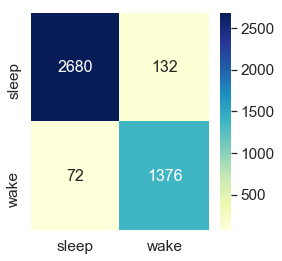


Classification Report:
-----------------------------
             precision    recall  f1-score   support

          1       0.97      0.95      0.96      2812
          2       0.91      0.95      0.93      1448

avg / total       0.95      0.95      0.95      4260



In [23]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = model_build(DecisionTreeClassifier(), X_train, y_train)
model_eval(dtc, X_test)

Accuracy:
-----------------------------
0.9711267605633803

Confusion Matrix:
-----------------------------


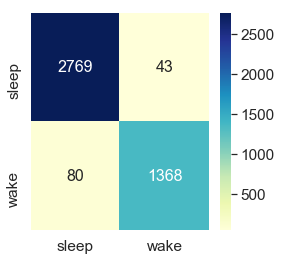


Classification Report:
-----------------------------
             precision    recall  f1-score   support

          1       0.97      0.98      0.98      2812
          2       0.97      0.94      0.96      1448

avg / total       0.97      0.97      0.97      4260



In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = model_build(RandomForestClassifier(n_estimators=20), X_train, y_train.ravel())
model_eval(rfc, X_test)

Accuracy:
-----------------------------
0.9744131455399061

Confusion Matrix:
-----------------------------


C:\Users\ailee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


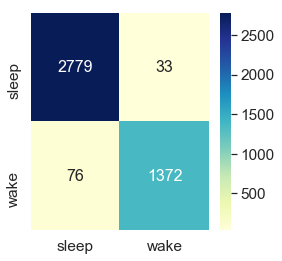


Classification Report:
-----------------------------
             precision    recall  f1-score   support

          1       0.97      0.99      0.98      2812
          2       0.98      0.95      0.96      1448

avg / total       0.97      0.97      0.97      4260



In [25]:
# Extreme Gradient Boosting
from xgboost import XGBClassifier

xgbc = model_build(XGBClassifier(n_estimators=150), X_train, y_train.ravel())
model_eval(xgbc, X_test)

Accuracy:
-----------------------------
0.8896713615023474

Confusion Matrix:
-----------------------------


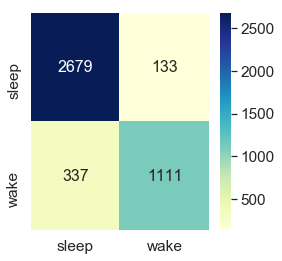


Classification Report:
-----------------------------
             precision    recall  f1-score   support

          1       0.89      0.95      0.92      2812
          2       0.89      0.77      0.83      1448

avg / total       0.89      0.89      0.89      4260



In [26]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnbc = model_build(GaussianNB(priors = None), X_train, y_train.ravel())

model_eval(gnbc, X_test)

Accuracy:
-----------------------------
0.9650234741784037

Confusion Matrix:
-----------------------------


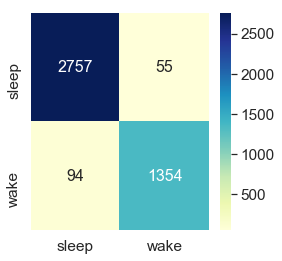


Classification Report:
-----------------------------
             precision    recall  f1-score   support

          1       0.97      0.98      0.97      2812
          2       0.96      0.94      0.95      1448

avg / total       0.96      0.97      0.96      4260



In [27]:
# Artificial Neural Network (MultiLayerPerceptor) - 20 hidden neurons
from sklearn.neural_network import MLPClassifier

annc = model_build(MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20), random_state=1), X_train, y_train.ravel())
model_eval(annc, X_test)

# Visualizing results
Visualizes the classification results of a night of data

In [3]:
predictions = load_csv('Subject_1_targets')
timestamps = load_csv('Subject_1_timestamps')

In [4]:

from matplotlib.ticker import MaxNLocator
def visualize_predictions(predictions, timestamps):
    predictions.columns = ['prediction']
    timestamps.columns = ['Time']
    
    data = pd.concat([predictions, timestamps], axis=1, sort=False)
    data['Time'] = pd.to_datetime(data['Time'])
    data = data.set_index(['Time'])
    
    plt.figure(figsize=(10,4))
    plt.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylabel('1 = Sleep. 2 = Wake')
    data.prediction.plot()


In [5]:
visualize_predictions(predictions, timestamps)

AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

<Figure size 720x288 with 0 Axes>